# Build and train a Convolutional Neural Network

The below code should seem familiar to you as it's very similar with the one we used when training a feedforward network. The difference is that this time we have a CNN. As always, you can find a sample solution in the last cell.

Once again, we will import all the necessary libraries along with our pet images dataset. The images will be transformed to tensors and will be normalized

KA: Made changes in the given code skeleton to run it locally.

In [1]:
# Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import utils
from torchvision import transforms

/home/kaushik/miniconda3/envs/py3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
flag_local_run = True

In [3]:
if flag_local_run:
    from torchvision.datasets import CIFAR10
else:
    import os
    import sys
    cwd = os.getcwd()
    #add CIFAR10 data in the environment
    sys.path.append(cwd + '/../cifar10')

    #CIFAR10 is a custom Dataloader that loads a subset ofthe data from a local folder
    from Cifar10Dataloader import CIFAR10

In [4]:
# Dataset path
if flag_local_run:
    dataset_path = '~/data/cifar10'
else:
    dataset_path = '../cifar10'

In [5]:
batch_size=4

def show_image(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def load_data():
    
    #convert the images to tensor and normalized them
    transform = transforms.Compose([
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

    trainset = CIFAR10(root=dataset_path,  transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=False, num_workers=1)
    return trainloader

## Define a CNN

Here you will come into play. Try to define the necessary layers and build the forward pass of our model. Remember that the model's structure is:


- A conv layer with 3 channels as input, 6 channels as output, and a 5x5 kernel
- A 2x2 max-pooling layer
- A conv layer with 6 channels as input, 16 channels as output, and a 5x5 kernel
- A linear layer with 16*5*5 nodes
- A linear layer with 120 nodes
- A linear layer with 84 nodes
- A linear layer with 10 nodes

The trickiest part when building CNNs is to find the correct dimensions for each layer. If you managed to use the correct arguments in the `Conv2d` layers, you will be ok. Also play close attention to first `Linear` layer. How will you be able to pass the feature map?

In [6]:
#1. DEFINE THE CNN HERE
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.linear1 = nn.Linear(in_features=1600, out_features=1655)
        self.linear2 = nn.Linear(in_features=1655, out_features=120)
        self.linear3 = nn.Linear(in_features=120, out_features=84)
        self.linear4 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        # print(f"x.shape: {x.shape}")
        h1 = torch.relu(self.cnn1(x))
        # print(f"h1.shape: {h1.shape}")
        h2 = self.pool1(h1)
        # print(f"h2.shape: {h2.shape}")
        h3 = torch.relu(self.cnn2(h2))
        # print(f"h3.shape: {h3.shape}")
        # Now flatten image tensor
        h3 = h3.view(-1, h3.shape[-3]*h3.shape[-2]*h3.shape[-1])
        h4 = torch.relu(self.linear1(h3))
        # print(f"h4.shape: {h4.shape}")
        h5 = torch.relu(self.linear2(h4))
        # print(f"h5.shape: {h5.shape}")
        h6 = torch.relu(self.linear3(h5))
        # print(f"h6.shape: {h6.shape}")
        o = torch.sigmoid(self.linear4(h6))
        # print(f"o.shape: {o.shape}")
        return o


## Train a CNN

Now that you have the model, let's build the training loop and execute a few epochs. Here you will have to :

- unwrap the input and labels
- develop the forward and backward pass
- print the loss every 2000 mini-batches (optionally)

Epoch: 1 :: i: 500 :: loss: 2.302378489971161
Epoch: 1 :: i: 1000 :: loss: 2.3024685034751893
Epoch: 1 :: i: 1500 :: loss: 2.302552173614502
Epoch: 1 :: i: 2000 :: loss: 2.3030652203559874
Epoch: 1 :: i: 2500 :: loss: 2.3019611082077027
Epoch: 1 :: i: 3000 :: loss: 2.302368392944336
Epoch: 1 :: i: 3500 :: loss: 2.301312066555023
Epoch: 1 :: i: 4000 :: loss: 2.300339187145233
Epoch: 1 :: i: 4500 :: loss: 2.2983535900115966
Epoch: 1 :: i: 5000 :: loss: 2.291921728134155
Epoch: 1 :: i: 5500 :: loss: 2.260178466796875
Epoch: 1 :: i: 6000 :: loss: 2.1856539731025695
Epoch: 1 :: i: 6500 :: loss: 2.141632641553879
Epoch: 1 :: i: 7000 :: loss: 2.120784728527069
Epoch: 1 :: i: 7500 :: loss: 2.1082751491069796
Epoch: 1 :: i: 8000 :: loss: 2.106063060760498
Epoch: 1 :: i: 8500 :: loss: 2.0907194430828095
Epoch: 1 :: i: 9000 :: loss: 2.070643063545227
Epoch: 1 :: i: 9500 :: loss: 2.0583112983703615
Epoch: 1 :: i: 10000 :: loss: 2.0477327010631563
Epoch: 1 :: i: 10500 :: loss: 2.0493185739517212
Ep

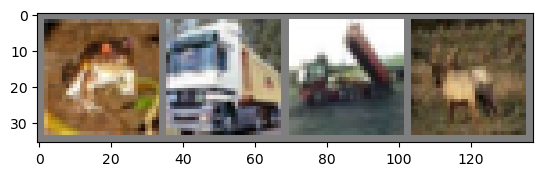

GroundTruth:   frog truck truck  deer
Predicted:  horse truck  ship  deer


In [8]:
#2. TRAIN THE MODEL HERE
def train(model, training_data):

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(params=model.parameters(), lr=0.001, momentum=0.9)
    running_loss = 0
    n_mini_batch = 0

    for epoch in range(10):  # loop over the dataset multiple times

        for i, data in enumerate(training_data, 0):
            # get the inputs; cifar10 is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()
            
            # forward + backward + optimize
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            # compute gadients
            loss.backward()
            # update parameters
            optimizer.step()
           
            # print statistics
            running_loss += loss.item()
            n_mini_batch += 1
            # print every 500 mini-batches
            if i % 500 == 499:
                print(f"Epoch: {epoch+1} :: i: {i+1} :: loss: {running_loss/n_mini_batch}")
                # reset the variables
                running_loss = 0
                n_mini_batch = 0
            

    print('Finished Training')



def evaluate(model):
    dataiter = iter(load_data())
    # images, labels = dataiter.next()
    images, labels = next(dataiter)

    # print images
    show_image(utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
    
    outputs = model(images)
    
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))



def main():

    training_data = load_data()

    model = CNN()

    train(model, training_data)
    
    evaluate(model)
    
main()

## Solution

In [ ]:
#1. DEFINE THE CNN 
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
#2. TRAIN THE MODEL 
def train(model, training_data):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    running_loss = 0.0

    for epoch in range(1):  # loop over the dataset multiple times

        for i, data in enumerate(training_data, 0):
            # get the inputs; cifar10 is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training')